In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside notebook
%matplotlib inline


In [2]:
# Load training dataset
train_df = pd.read_csv("../data/train.csv")

# Load test dataset
test_df = pd.read_csv("../data/test.csv")

# Show first 5 rows
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Shape of dataset (rows, columns)
train_df.shape


(891, 12)

In [4]:
# Column names and data types
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Summary statistics (numeric columns)
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Missing values check
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# First 10 rows to see the data
train_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# Survival counts
train_df['Survived'].value_counts()

# Percentage survival
train_df['Survived'].value_counts(normalize=True) * 100


Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

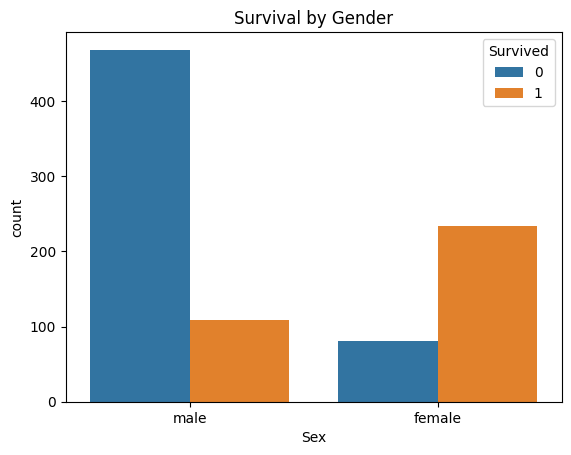

In [9]:
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Survival by Gender")
plt.show()


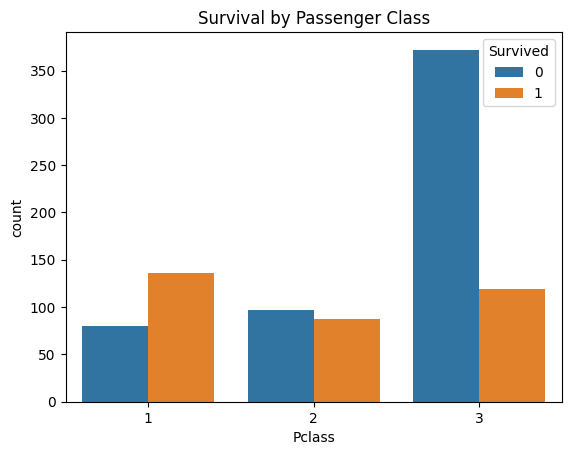

In [10]:
sns.countplot(x="Pclass", hue="Survived", data=train_df)
plt.title("Survival by Passenger Class")
plt.show()


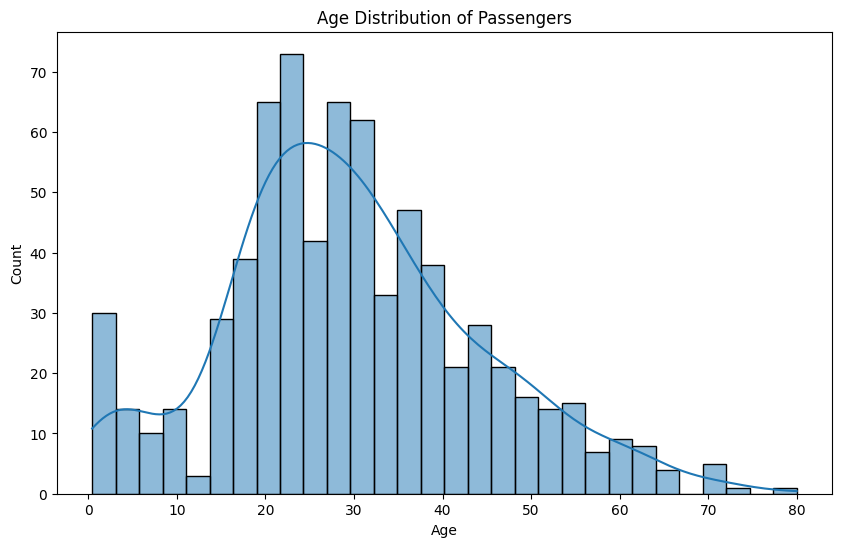

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


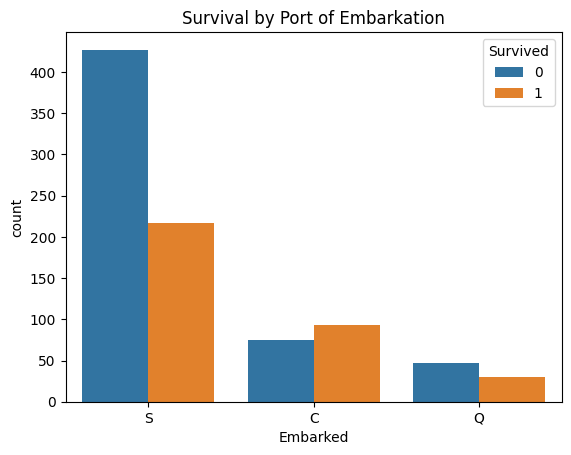

In [12]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title("Survival by Port of Embarkation")
plt.show()


In [13]:
train_df.groupby('Embarked')['Survived'].mean() * 100


Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [14]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1


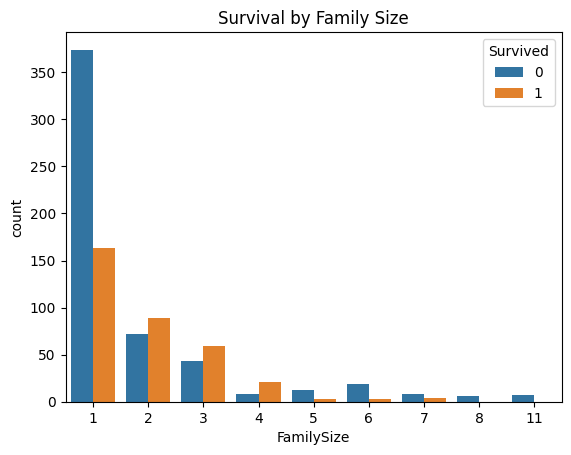

In [15]:
sns.countplot(x='FamilySize', hue='Survived', data=train_df)
plt.title("Survival by Family Size")
plt.show()


C:\Users\isrut\AppData\Local\Temp\ipykernel_23804\366466026.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Survived']==1]['Age'].dropna(), label='Survived', shade=True)
C:\Users\isrut\AppData\Local\Temp\ipykernel_23804\366466026.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Survived']==0]['Age'].dropna(), label='Did Not Survive', shade=True)


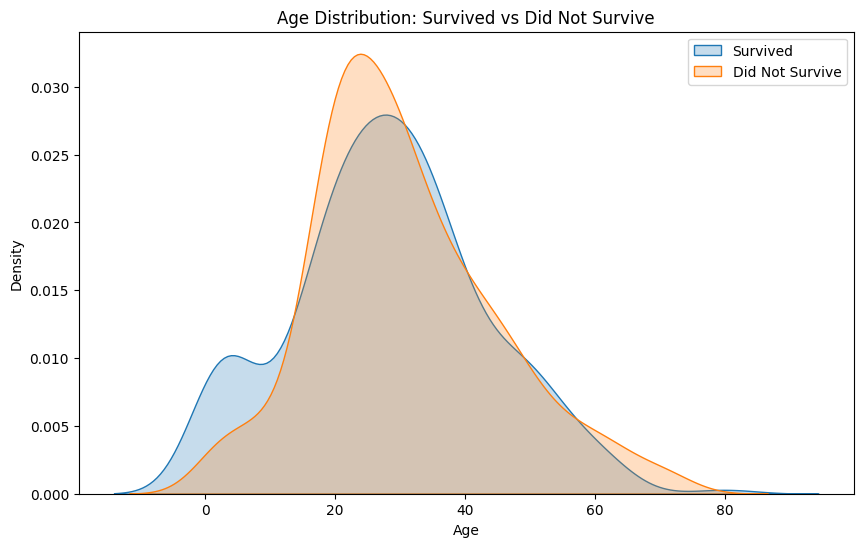

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(train_df[train_df['Survived']==1]['Age'].dropna(), label='Survived', shade=True)
sns.kdeplot(train_df[train_df['Survived']==0]['Age'].dropna(), label='Did Not Survive', shade=True)
plt.title("Age Distribution: Survived vs Did Not Survive")
plt.legend()
plt.show()


C:\Users\isrut\AppData\Local\Temp\ipykernel_23804\2456005049.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Survived']==1]['Fare'], label='Survived', shade=True)
C:\Users\isrut\AppData\Local\Temp\ipykernel_23804\2456005049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Survived']==0]['Fare'], label='Did Not Survive', shade=True)


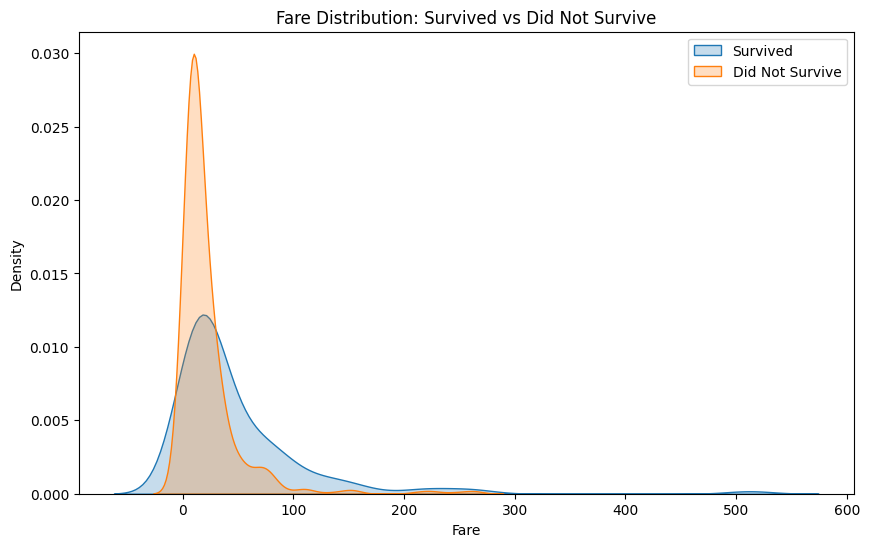

In [17]:
plt.figure(figsize=(10,6))
sns.kdeplot(train_df[train_df['Survived']==1]['Fare'], label='Survived', shade=True)
sns.kdeplot(train_df[train_df['Survived']==0]['Fare'], label='Did Not Survive', shade=True)
plt.title("Fare Distribution: Survived vs Did Not Survive")
plt.legend()
plt.show()


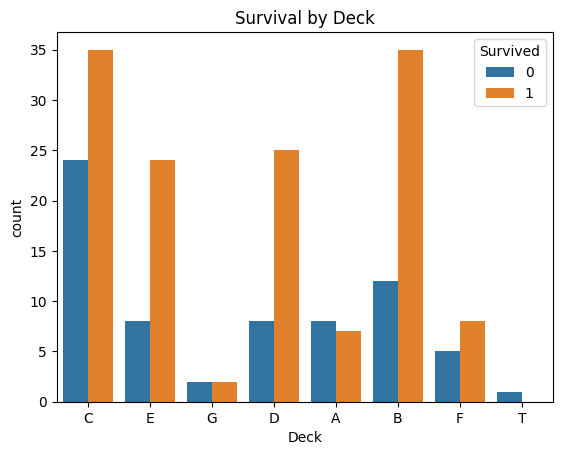

In [18]:
train_df['Deck'] = train_df['Cabin'].str[0]  # first letter = deck
sns.countplot(x='Deck', hue='Survived', data=train_df)
plt.title("Survival by Deck")
plt.show()


In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x600 with 0 Axes>

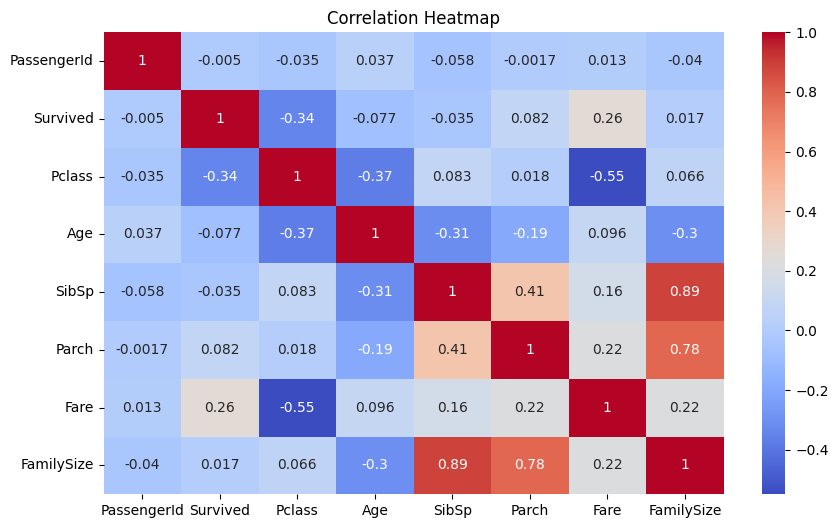

In [20]:
plt.figure(figsize=(10,6))

# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=np.number)

sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [21]:
# Extract title
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Quick check
train_df['Title'].value_counts()


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\isrut\AppData\Local\Temp\ipykernel_23804\1739488268.py:2: SyntaxWarning: invalid escape sequence '\.'
  train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [22]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Other')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')


In [23]:
train_df['AgeGroup'] = train_df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')


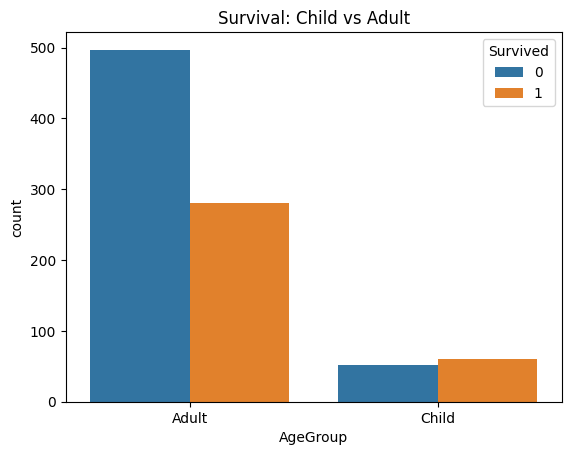

In [24]:
sns.countplot(x='AgeGroup', hue='Survived', data=train_df)
plt.title("Survival: Child vs Adult")
plt.show()


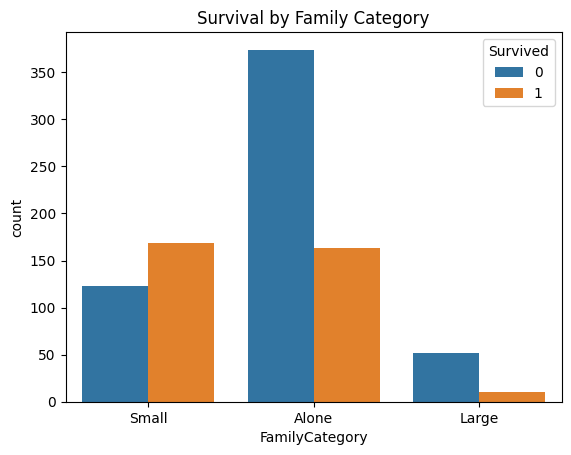

In [25]:
def family_category(size):
    if size == 1:
        return 'Alone'
    elif size <= 4:
        return 'Small'
    else:
        return 'Large'

train_df['FamilyCategory'] = train_df['FamilySize'].apply(family_category)

sns.countplot(x='FamilyCategory', hue='Survived', data=train_df)
plt.title("Survival by Family Category")
plt.show()


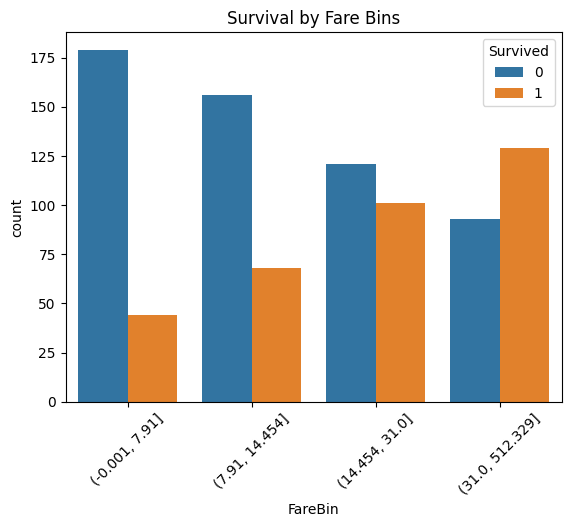

In [26]:
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)  # Quartiles
sns.countplot(x='FareBin', hue='Survived', data=train_df)
plt.title("Survival by Fare Bins")
plt.xticks(rotation=45)
plt.show()


In [27]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C':1, 'Q':2})
train_df['Title'] = train_df['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Other':4})


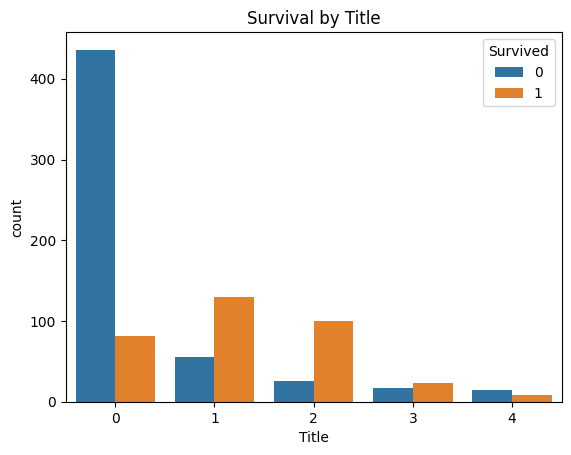

In [28]:
sns.countplot(x='Title', hue='Survived', data=train_df)
plt.title("Survival by Title")
plt.show()


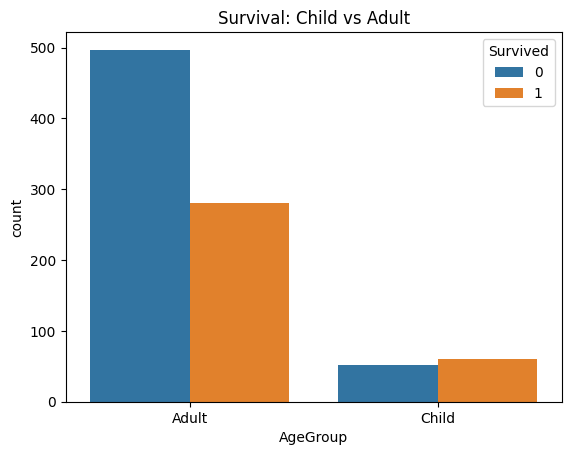

In [29]:
sns.countplot(x='AgeGroup', hue='Survived', data=train_df)
plt.title("Survival: Child vs Adult")
plt.show()


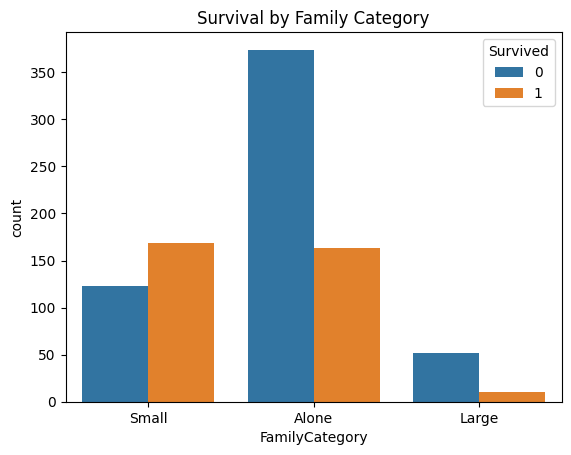

In [30]:
sns.countplot(x='FamilyCategory', hue='Survived', data=train_df)
plt.title("Survival by Family Category")
plt.show()


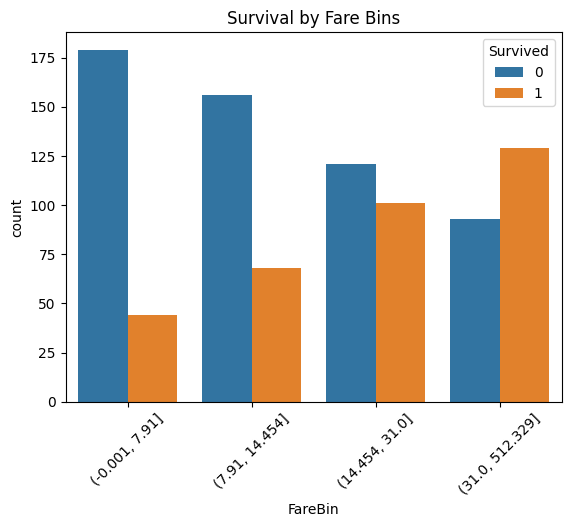

In [31]:
sns.countplot(x='FareBin', hue='Survived', data=train_df)
plt.title("Survival by Fare Bins")
plt.xticks(rotation=45)
plt.show()


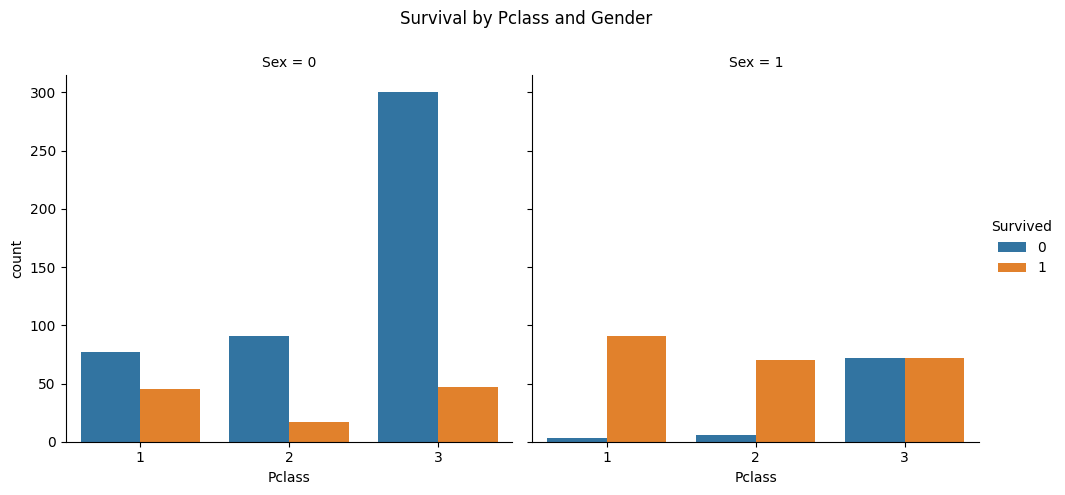

In [32]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', data=train_df, kind='count')
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Pclass and Gender')
plt.show()
